# Big Data Analysis for Industrial Application Final Project

### By Daeyoung In

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import colors
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
#Read "marketing_campaign.csv" data set
data = pd.read_csv("marketing_campaign.csv", sep="\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Pre-Processing

### Imputation

In [4]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#Perform imputation using regression to fill in missing 'Income' values
import statsmodels.formula.api as sm

#Regression
model = sm.ols(formula="Income ~ Kidhome + Teenhome + Recency + MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds + NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth", data=data).fit()
model.params

Intercept              49097.361693
Kidhome                 2386.869233
Teenhome                5648.103258
Recency                  -18.580283
MntWines                  16.571854
MntFruits                 17.855568
MntMeatProducts           19.697434
MntFishProducts            4.799071
MntSweetProducts          24.057747
MntGoldProds              -9.245804
NumDealsPurchases       -474.566689
NumWebPurchases         1139.217733
NumCatalogPurchases      808.041741
NumStorePurchases        383.836411
NumWebVisitsMonth      -3200.794726
dtype: float64

In [6]:
#Find subjects with missing values
inds = pd.isnull(data).any(1)
missing = data[inds==True]
missing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [7]:
#Find imputation values
predict = np.round(pd.DataFrame(model.predict(missing), columns = ['Income']),0)
predict

,Income
10,30636.0
27,81844.0
43,48059.0
48,43764.0
58,34373.0
71,29894.0
90,46583.0
91,35597.0
92,68471.0
128,50294.0


In [8]:
#Fill missing values with new values
data = data.fillna(value=predict)
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Feature Extraction and Processing

In [9]:
#Ignore trivial warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(0)

In [10]:
#Create new feature: 'Customer_Dur'
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
time = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
date_newest = max(dates) #newest customer
for j in dates:
    delta = date_newest - j
    time.append(delta)
data["Customer_Duration"] = time
data["Customer_Duration"] = pd.to_numeric(data["Customer_Duration"], errors="coerce")

In [11]:
#Check values in 'Education' variable
data["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [12]:
#Check values in 'Marital_Status' variable
data["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [13]:
#Customer Age
data["Age"] = 2022-data["Year_Birth"]

#Customer Spendings
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Living Situation based on marital status
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Total number of children
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Family Size
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Education levels divided into 3 groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Renaming variables for amount spent on products
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Remove unnecessary variables
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

#This code snippet is cited from the following article.
#https://thecleverprogrammer.com/2021/02/08/customer-personality-analysis-with-python/

In [14]:
#Color map
color_pal = ["#FFA54F", "#8B0000", "#9F8A78", "#FF3030"]
color_map = colors.ListedColormap(["#FFA54F", "#8B0000", "#9F8A78", "#FF3030"])

<Figure size 432x288 with 0 Axes>

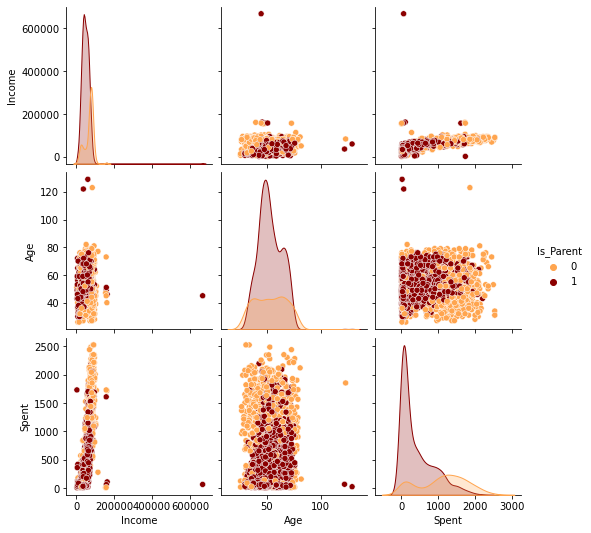

In [15]:
#Outlier detection
features = [ "Income", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(data[features], hue= "Is_Parent",palette= (["#FFA54F", "#8B0000"]))
plt.show()

In [16]:
#Removing outliers and resetting indices
data = data[(data["Income"]<600000)]
data = data[(data["Age"]<90)]
data.reset_index(drop = True, inplace = True)

<Figure size 432x288 with 0 Axes>

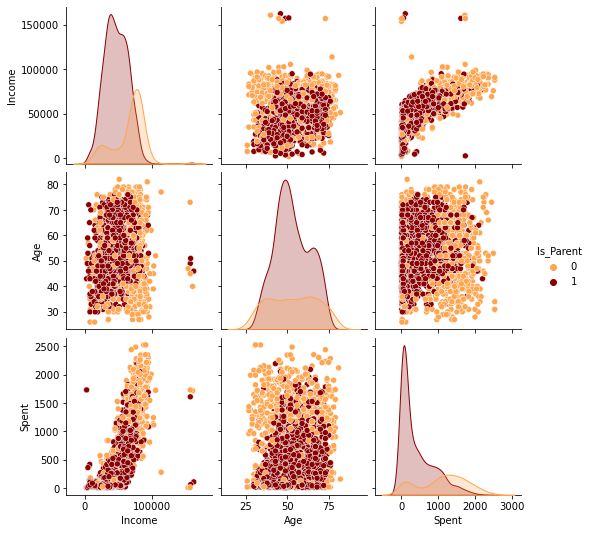

In [17]:
#Plot features after dropping outliers
features = [ "Income", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(data[features], hue= "Is_Parent",palette= (["#FFA54F", "#8B0000"]))
plt.show()

In [18]:
#Identify categorical data
cat = (data.dtypes == 'object')
cat_data = list(cat[cat].index)
cat_data

['Education', 'Living_With']

In [19]:
#Make categorical data numerical using one-hot encoding.
LE=LabelEncoder()
for k in cat_data:
    data[k]=data[[k]].apply(LE.fit_transform)

### Standardization

In [20]:
rem_col = ['Response', 'Complain','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
copy = data.copy()
copy = copy.drop(rem_col, axis=1)
scaler = StandardScaler()
scaler.fit(copy)
data_scaled = pd.DataFrame(scaler.transform(copy),columns= copy.columns )

In [21]:
#Scaled data
data_scaled

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Duration,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.89438,0.288294,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,...,2.509801,-0.552429,0.692865,1.975467,1.016868,1.680176,-1.347635,-1.264308,-1.758810,-1.584362
1,-0.89438,-0.260713,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,...,-0.568970,-1.167738,-0.131421,-1.667017,1.273264,-0.962202,-1.347635,1.395139,0.445618,0.631169
2,-0.89438,0.915552,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,...,-0.226884,1.293496,-0.543564,-0.172996,0.333146,0.282541,0.742041,-1.264308,-0.656596,-1.584362
3,-0.89438,-1.177649,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,...,-0.911056,-0.552429,0.280722,-1.925349,-1.290693,-0.918994,0.742041,0.065416,0.445618,0.631169
4,0.57070,0.295509,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,...,0.115201,0.062879,-0.131421,-0.823131,-1.034298,-0.305762,0.742041,0.065416,0.445618,0.631169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,-0.89438,0.431900,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,0.081700,2.201960,...,0.115201,-0.552429,-0.131421,0.124086,0.162216,1.221499,0.742041,0.065416,0.445618,0.631169
2232,0.57070,0.561820,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,-0.687019,-0.655857,...,-0.226884,-0.244775,0.692865,-1.942571,1.956986,-0.269201,0.742041,2.724862,2.650045,0.631169
2233,-0.89438,0.234436,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,-0.101329,-0.365231,...,0.115201,2.216459,0.280722,-0.848965,-1.034298,1.055312,-1.347635,-1.264308,-1.758810,-1.584362
2234,0.57070,0.805322,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,0.777208,0.070707,...,0.799373,1.293496,-0.955707,-0.844659,1.102333,0.393886,0.742041,0.065416,0.445618,0.631169


### Correlation Matrix

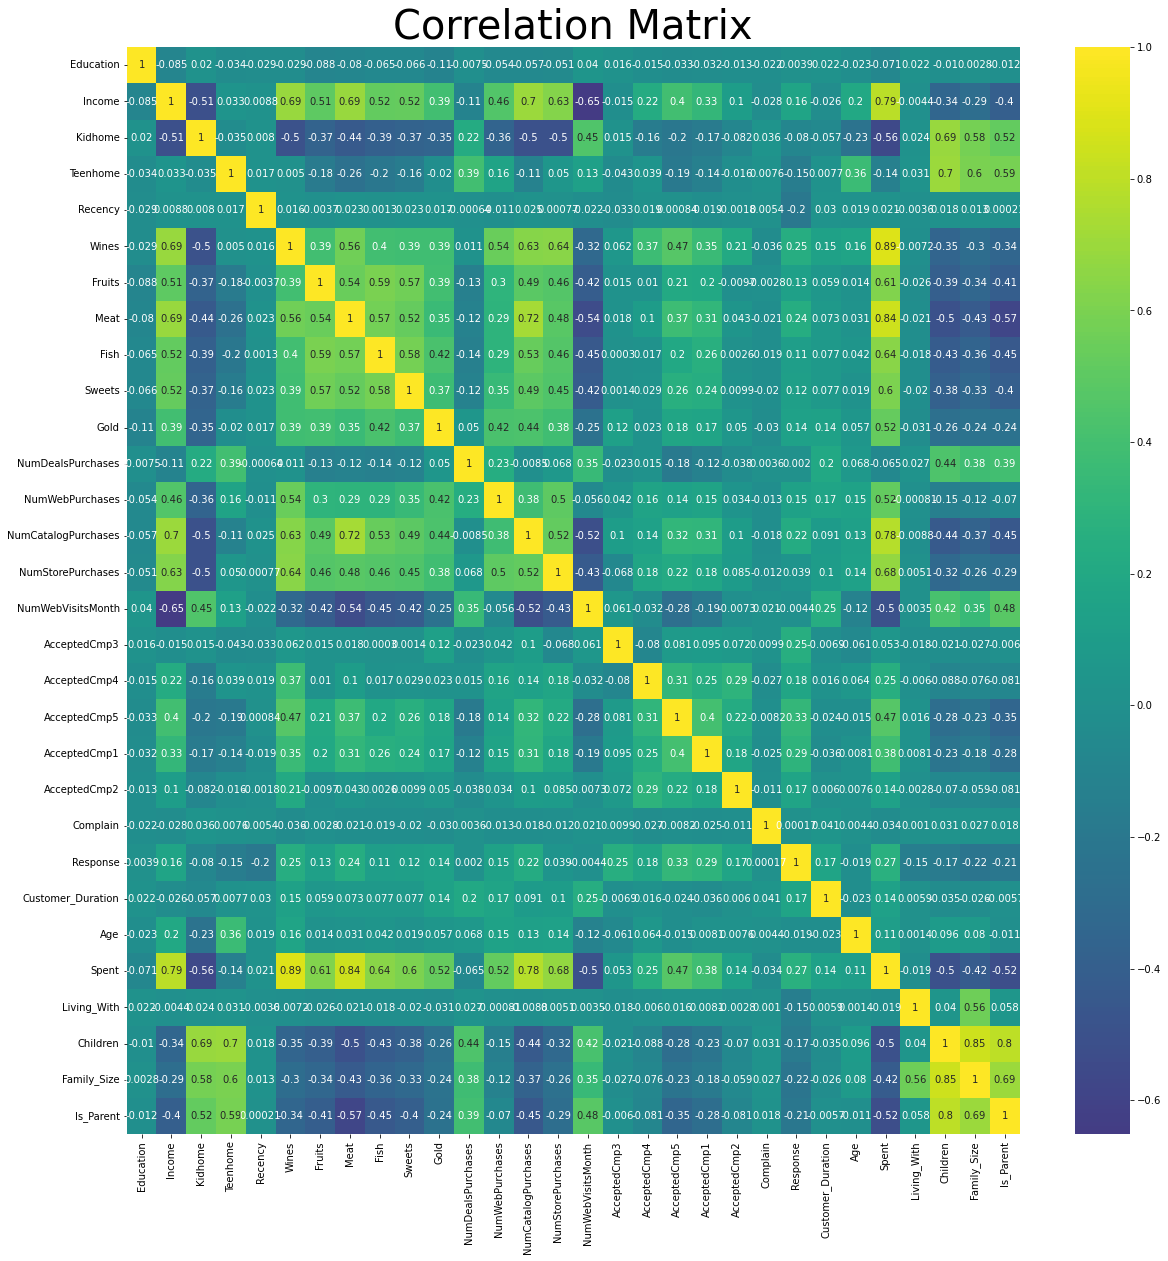

In [22]:
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix', fontsize=40)
sns.heatmap(data.corr(), center=0, annot=True, cmap = "viridis")
plt.show()

In [23]:
#Variables with high correlations
for var1 in data.columns:
    for var2 in data.columns:
        if ((data.corr().loc[var1,var2] >=0.8) & (data.corr().loc[var1,var2] <1.0)):
            print("Correlation b/w "+ var1,"&",var2,":",data.corr().loc[var1,var2])

Correlation b/w Wines & Spent : 0.8916961006027686
Correlation b/w Meat & Spent : 0.8426241557092095
Correlation b/w Spent & Wines : 0.8916961006027686
Correlation b/w Spent & Meat : 0.8426241557092095
Correlation b/w Children & Family_Size : 0.8498397865707489
Correlation b/w Family_Size & Children : 0.8498397865707489


## Data Analysis and Visualization

### Principal Component Analysis

In [24]:
#Calculate and sort eigenvalues and eigenvectors of correlation matrix
eigval, eigvec = np.linalg.eig(data_scaled.corr())
p=len(data_scaled.T)
order = np.argsort(eigval)[::-1]
eigval = eigval[order]
eigvec = eigvec[:,order]

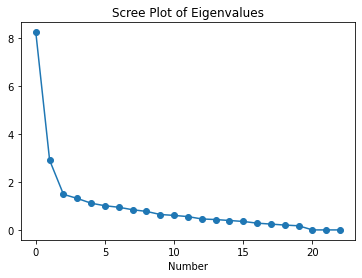

In [25]:
#Scree plot of eigenvalues
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Number')
plt.plot(eigval, 'o-')
plt.show()

In [26]:
prop = pd.DataFrame(index=range(p), columns=['eigenvalues', 'proportion', 'cumulative'])
prop['eigenvalues'] = eigval
prop['proportion'] = eigval/p

prop.loc[0,'cumulative']=prop.loc[0,'proportion']
for i in range(1,p):
    prop.loc[i,'cumulative']=prop.loc[i,'proportion']+prop.loc[i-1,'cumulative']

In [27]:
#Table of eigenvalues, corresponding proportion, and cumulative sum
pd.DataFrame(prop)

,eigenvalues,proportion,cumulative
0,8.257478e+00,3.590208e-01,0.359021
1,2.910493e+00,1.265432e-01,0.485564
2,1.485959e+00,6.460691e-02,0.550171
3,1.314677e+00,5.715985e-02,0.607331
4,1.115727e+00,4.850987e-02,0.655841
5,1.009863e+00,4.390709e-02,0.699748
6,9.462614e-01,4.114180e-02,0.740889
7,8.429542e-01,3.665018e-02,0.77754
8,7.731661e-01,3.361592e-02,0.811156
9,6.437672e-01,2.798988e-02,0.839145


In [28]:
#Principal Component Analysis to 2 dimensions
pca = PCA(n_components=2)
pca.fit(data_scaled)
PCA_result = pd.DataFrame(pca.transform(data_scaled), columns=(["PC1","PC2"]))
PCA_result #PC scores

,PC1,PC2
0,4.989663,-0.137971
1,-2.872048,-0.003778
2,2.623793,-0.725879
3,-2.662783,-1.539989
4,-0.639003,0.207430
...,...,...
2231,2.310992,2.433919
2232,-3.100962,4.004767
2233,2.687067,-1.859929
2234,1.496479,1.694415


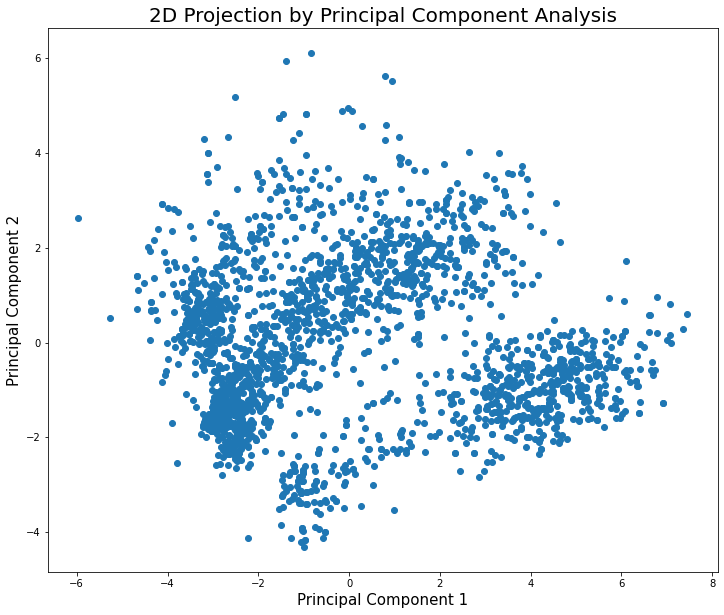

In [29]:
#2D Projection by PCA
x =PCA_result["PC1"]
y =PCA_result["PC2"]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(x,y, marker="o")
ax.set_xlabel('Principal Component 1', fontdict={'fontsize': 15})
ax.set_ylabel('Principal Component 2', fontdict={'fontsize': 15})
ax.set_title("2D Projection by Principal Component Analysis", fontdict={'fontsize': 20})
plt.show()

In [30]:
#Correlations between original variables and PC Scores
corr = pd.DataFrame(eigvec)
col_names = []
for i in range(len(data_scaled.T)):
    col_names.append("PC"+str(i+1))
    corr.iloc[:,i]=corr.iloc[:,i]*np.sqrt(eigval[i])
corr.index = data_scaled.columns
corr.columns = col_names
corr

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Education,-0.076293,-0.093526,-0.055256,-0.064755,0.614663,-0.071420,0.713277,-0.258828,-0.104069,-0.068453,...,-0.020844,-0.016808,0.006812,0.005132,-0.019102,0.007642,-0.010355,4.572979e-24,4.234571e-25,NaN
Income,0.803344,0.281079,0.256030,-0.019624,-0.030800,-0.031230,0.103757,0.150336,0.048505,0.076658,...,0.069217,-0.048860,0.135852,0.078482,0.118247,0.022713,-0.328223,-6.589471e-23,-5.858694e-23,NaN
Kidhome,-0.706471,0.025077,-0.060141,0.393574,-0.264397,-0.072506,0.254361,0.102523,0.161775,-0.128023,...,0.200399,-0.057684,0.056042,-0.027100,0.014542,-0.047869,0.013000,-5.366205e-09,4.546385e-09,NaN
Teenhome,-0.285441,0.777039,0.233768,-0.295624,-0.046051,-0.008202,0.010477,-0.135531,-0.009546,0.166930,...,-0.179251,0.049577,-0.053651,0.115890,-0.018862,-0.096782,0.036541,-5.427496e-09,4.598312e-09,NaN
Recency,0.011849,0.032078,0.017961,0.028353,-0.189314,0.943020,0.205133,-0.003764,-0.163656,0.005030,...,-0.017949,0.007721,0.010944,0.001233,0.000982,0.000762,-0.007218,2.274805e-24,-3.684086e-25,NaN
Wines,0.734237,0.346478,-0.093913,-0.092954,0.167779,0.028088,0.051220,0.333271,-0.001303,0.089579,...,-0.050886,0.035042,-0.226227,-0.004278,0.193600,0.046973,0.090187,-1.643415e-08,-4.253946e-09,NaN
Fruits,0.687061,0.038517,0.002574,0.240518,-0.209997,-0.089931,0.039888,-0.315934,0.007897,0.111785,...,-0.338492,-0.299036,0.062082,-0.044516,0.055174,0.003414,0.003792,-1.939532e-09,-5.020436e-10,NaN
Meat,0.815847,0.012275,0.047670,0.174955,-0.044951,0.021111,0.119749,0.187477,0.269859,-0.103829,...,-0.109476,-0.020410,0.061248,0.177646,-0.311638,0.100655,0.035918,-1.101934e-08,-2.852332e-09,NaN
Fish,0.716067,0.023321,0.002157,0.235075,-0.162225,-0.059965,0.047155,-0.328747,0.063540,-0.029575,...,-0.033589,0.511501,0.063986,0.011592,0.054794,0.009691,-0.006935,-2.668226e-09,-6.906645e-10,NaN
Sweets,0.680717,0.063394,-0.005580,0.230482,-0.183649,-0.049330,0.074215,-0.324788,-0.027668,0.170777,...,0.192357,-0.098082,-0.256072,-0.018053,0.003033,0.004704,0.003620,-2.016456e-09,-5.219552e-10,NaN


### Clustering

#### Hierarchical Clustering

In [31]:
#Hierarchical clustering using 'AgglomerativeClustering'
from sklearn.cluster import AgglomerativeClustering

hclus = AgglomerativeClustering(n_clusters=4)
group = hclus.fit_predict(PCA_result)
PCA_result["clusters"] = group
data["clusters"]= group

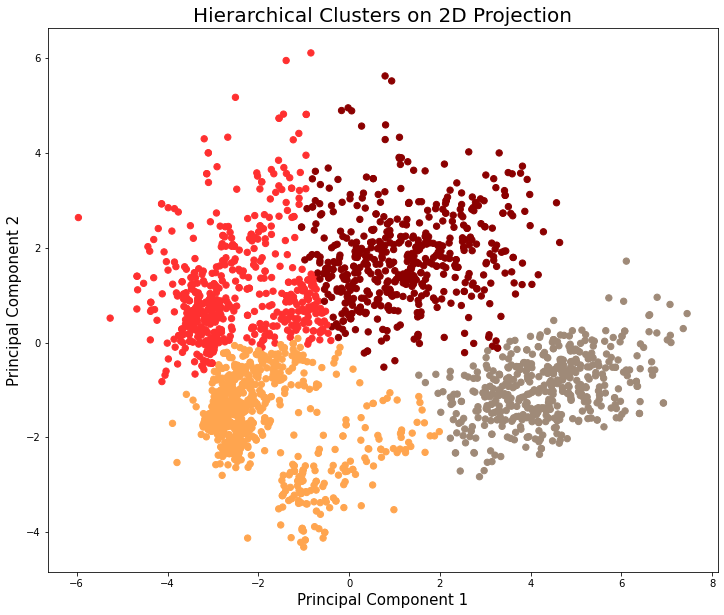

In [32]:
#Plotting the hierarchical clusters
fig = plt.figure(figsize=(12,10))

ax = plt.subplot(111, label="bla")
ax.set_title("Hierarchical Clusters on 2D Projection", fontdict={'fontsize': 20})
ax.set_xlabel('Principal Component 1', fontdict={'fontsize': 15})
ax.set_ylabel('Principal Component 2', fontdict={'fontsize': 15})
ax.scatter(x, y, s=40, c=data["clusters"], marker='o', cmap = color_map )

plt.show()

#### K-means Clustering

In [33]:
#Conduct K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 6).fit(data_scaled)
group = pd.DataFrame(kmeans.labels_, columns=['clusters'])

Xkmean = data_scaled.iloc[:,1:].join(group)
Xkmean

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,NumStorePurchases,NumWebVisitsMonth,Customer_Duration,Age,Spent,Living_With,Children,Family_Size,Is_Parent,clusters
0,0.288294,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,...,-0.552429,0.692865,1.975467,1.016868,1.680176,-1.347635,-1.264308,-1.758810,-1.584362,2
1,-0.260713,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,...,-1.167738,-0.131421,-1.667017,1.273264,-0.962202,-1.347635,1.395139,0.445618,0.631169,3
2,0.915552,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,...,1.293496,-0.543564,-0.172996,0.333146,0.282541,0.742041,-1.264308,-0.656596,-1.584362,2
3,-1.177649,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,...,-0.552429,0.280722,-1.925349,-1.290693,-0.918994,0.742041,0.065416,0.445618,0.631169,0
4,0.295509,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,...,0.062879,-0.131421,-0.823131,-1.034298,-0.305762,0.742041,0.065416,0.445618,0.631169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,0.431900,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,0.081700,2.201960,3.900428,...,-0.552429,-0.131421,0.124086,0.162216,1.221499,0.742041,0.065416,0.445618,0.631169,1
2232,0.561820,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,-0.687019,-0.655857,-0.691317,...,-0.244775,0.692865,-1.942571,1.956986,-0.269201,0.742041,2.724862,2.650045,0.631169,3
2233,0.234436,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,-0.101329,-0.365231,-0.383920,...,2.216459,0.280722,-0.848965,-1.034298,1.055312,-1.347635,-1.264308,-1.758810,-1.584362,2
2234,0.805322,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,0.777208,0.070707,0.326936,...,1.293496,-0.955707,-0.844659,1.102333,0.393886,0.742041,0.065416,0.445618,0.631169,1


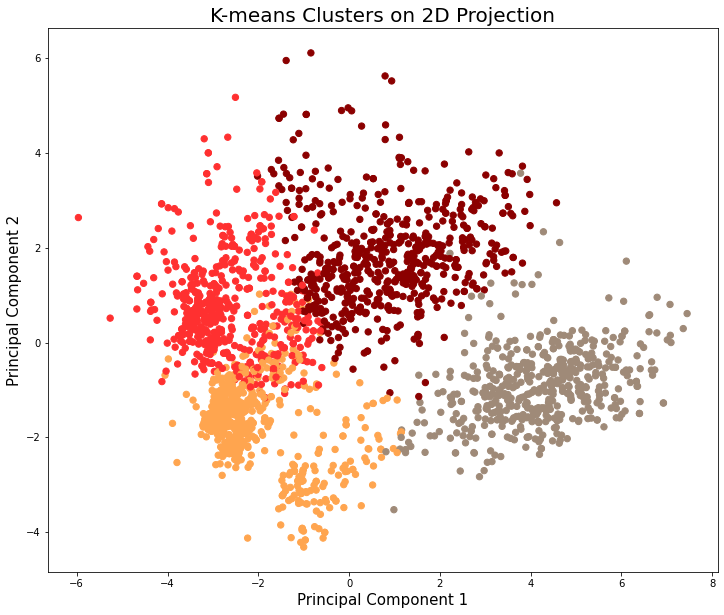

In [34]:
#Plotting the K-means clusters
color_map2 = colors.ListedColormap(["#FFA54F","#8B0000","#9F8A78","#FF3030"])
fig2 = plt.figure(figsize=(12,10))

ax2 = plt.subplot(111, label="bla")
ax2.set_title("K-means Clusters on 2D Projection", fontdict={'fontsize': 20})
ax2.set_xlabel('Principal Component 1', fontdict={'fontsize': 15})
ax2.set_ylabel('Principal Component 2', fontdict={'fontsize': 15})
ax2.scatter(x, y, s=40, c=Xkmean.iloc[:,-1], marker='o', cmap = color_map2)

plt.show()

#### Comparison Between Hierarchical and K-means Clusters

In [35]:
#Compare Hiearchical and K-means clusters using confusion matrix
from sklearn.metrics import confusion_matrix
y_hier = pd.Series(data["clusters"])
y_kmean = pd.Series(Xkmean['clusters'])
C1 = pd.DataFrame(confusion_matrix(y_hier, y_kmean),
                  index = np.sort(y_hier.unique()), 
                  columns = np.sort(y_kmean.unique()))
C1['Total'] = C1.sum(axis = 1) #row sum
C1.loc['Total',:] = C1.sum(axis = 0) # column sum
C1.index.names = ['Hierarchical'] ; C1.columns.names = ['K-means']
C1.astype(int)

K-means,0,1,2,3,Total
Hierarchical,,,,,
0,584,6,18,82,690
1,0,499,24,2,525
2,0,1,471,0,472
3,24,81,0,444,549
Total,608,587,513,528,2236


In [36]:
#Labels for the next plot
label1 = pd.concat([data["clusters"],pd.DataFrame(np.repeat(["Hierarchical"],2236))], axis=1)
label2 = pd.concat([Xkmean["clusters"],pd.DataFrame(np.repeat(["K-means"],2236))], axis=1)
clusters = pd.concat([label1,label2])
clusters.columns = ["cluster_label","cluster_method"]
clusters

,cluster_label,cluster_method
0,2,Hierarchical
1,3,Hierarchical
2,2,Hierarchical
3,0,Hierarchical
4,3,Hierarchical
...,...,...
2231,1,K-means
2232,3,K-means
2233,2,K-means
2234,1,K-means


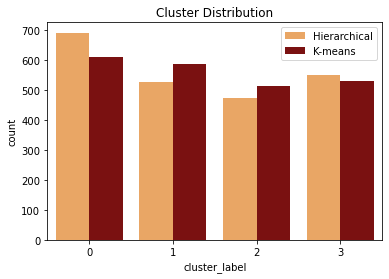

In [37]:
#Count and compare clusters obtained from hierarchical and K-means clustering
pl3 = sns.countplot(x="cluster_label", hue = "cluster_method", data = clusters, palette= color_pal)
pl3.set_title("Cluster Distribution")
plt.legend(prop={'size': 10})
plt.show()

In [38]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

average silhouette score: 0.1460661643382939


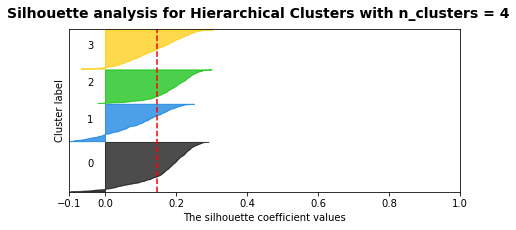

In [39]:
#Hierarchical Clustering Silhouette Scores
n_clusters = 4
fig, ax1 = plt.subplots(1)
fig.set_size_inches(7, 3)

#The first subplot is the silhouette plot
#The silhouette coefficient can range from [-1,1]
ax1.set_xlim([-0.1, 1])
#The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])

#Cluster labels
cluster_labels = data["clusters"]

#The silhouette_score gives the average value for all the samples.
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print("average silhouette score:", silhouette_avg)

#Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    #Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    #Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    #Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

#The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  #Clear the y-axis labels
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.suptitle(("Silhouette analysis for Hierarchical Clusters with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')
plt.show()

average silhouette score: 0.1546551725091055


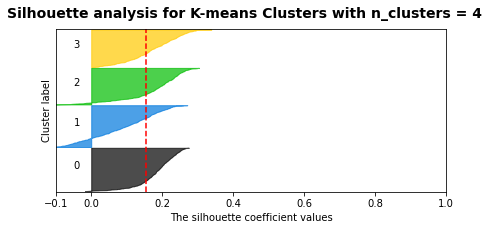

In [40]:
#K-means Clustering Silhouette Scores
n_clusters = 4
fig, ax2 = plt.subplots(1)
fig.set_size_inches(7, 3)

#The first subplot is the silhouette plot
#The silhouette coefficient can range from [-1, 1]
ax2.set_xlim([-0.1, 1])
#The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
ax2.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])

#Initialize the clusterer with n_clusters value and a random generator
cluster_labels = Xkmean["clusters"]

#The silhouette_score gives the average value for all the samples.
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print("average silhouette score:", silhouette_avg)

#Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    #Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax2.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    #Label the silhouette plots with their cluster numbers at the middle
    ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    #Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax2.set_xlabel("The silhouette coefficient values")
ax2.set_ylabel("Cluster label")

#The vertical line for average silhouette score of all the values
ax2.axvline(x=silhouette_avg, color="red", linestyle="--")

ax2.set_yticks([])  #Clear the y-axis labels
ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.suptitle(("Silhouette analysis for K-means Clusters with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')
plt.show()

#### Cluster Analysis

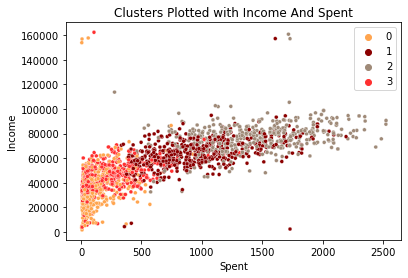

In [41]:
#Cluster profile plotted with 'Income' and 'Spent' variables
pl4 = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["clusters"], palette= color_pal, s=15)
pl4.set_title("Clusters Plotted with Income And Spent")
plt.legend(prop={'size': 10})
plt.show()

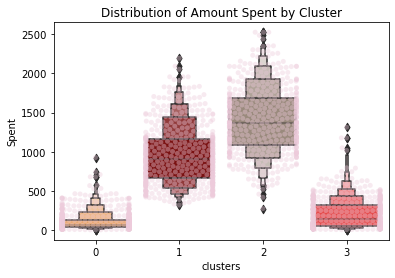

In [42]:
#Distribution of Amount Spent by Cluster
plt.figure()
pl5=sns.boxenplot(x=data["clusters"], y=data["Spent"], palette=color_pal)
pl5=sns.swarmplot(x=data["clusters"], y=data["Spent"], alpha=0.4, color= "#EDCBDB")
pl5.set_title("Distribution of Amount Spent by Cluster")
plt.show()

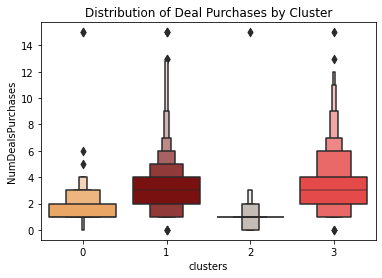

In [43]:
#Distribution of Deal Purchases by Cluster
plt.figure()
pl6=sns.boxenplot(y=data["NumDealsPurchases"],x=data["clusters"], palette= color_pal)
pl6.set_title("Distribution of Deal Purchases by Cluster")
plt.show()

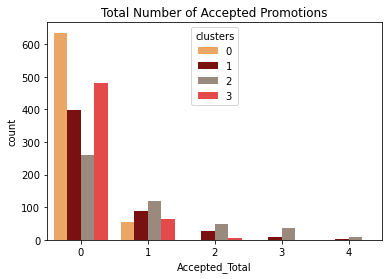

In [44]:
#Total Number of Accepted Promotions
data["Accepted_Total"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]
plt.figure()
pl7 = sns.countplot(x=data["Accepted_Total"],hue=data["clusters"], palette= color_pal)
pl7.set_title("Total Number of Accepted Promotions")
plt.show()

<Figure size 432x288 with 0 Axes>

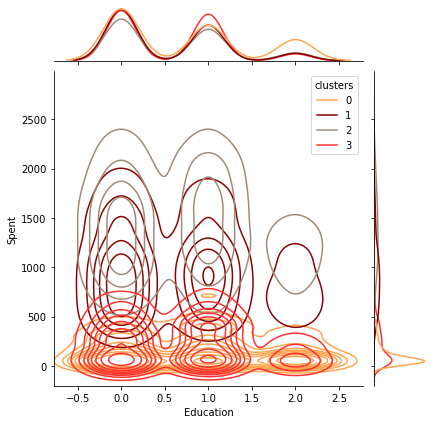

In [45]:
#Jointplot of Customers' Personal Traits
#(a)Education
plt.figure()
sns.jointplot(x=data["Education"], y = data["Spent"], hue = data["clusters"], kind = "kde", palette = color_pal)
plt.xlabel("Education", fontsize=25)
plt.ylabel("Spent", fontsize=25)
plt.show()

<Figure size 432x288 with 0 Axes>

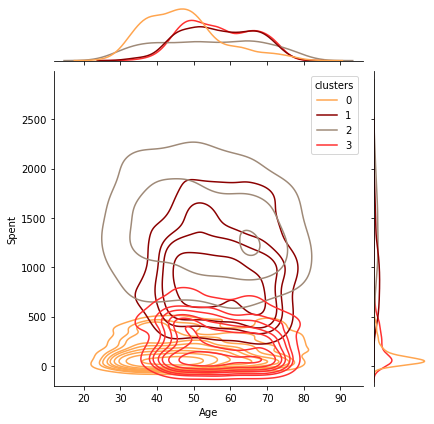

In [46]:
#(b)Age
plt.figure()
sns.jointplot(x=data["Age"], y = data["Spent"], hue = data["clusters"], kind = "kde", palette = color_pal)
plt.xlabel("Age", fontsize=25)
plt.ylabel("Spent", fontsize=25)
plt.show()

<Figure size 432x288 with 0 Axes>

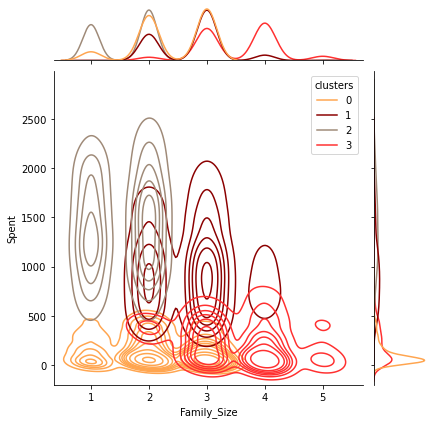

In [47]:
#(c)Family Size
plt.figure()
sns.jointplot(x=data["Family_Size"], y = data["Spent"], hue = data["clusters"], kind = "kde", palette = color_pal)
plt.xlabel("Family_Size", fontsize=25)
plt.ylabel("Spent", fontsize=25)
plt.show()

<Figure size 432x288 with 0 Axes>

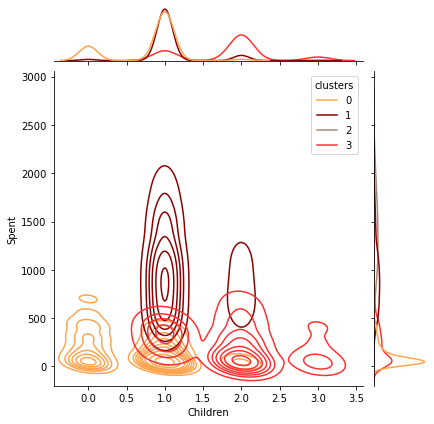

In [48]:
#(d)Children
plt.figure()
sns.jointplot(x=data["Children"], y = data["Spent"], hue = data["clusters"], kind = "kde", palette = color_pal)
plt.xlabel("Children", fontsize=25)
plt.ylabel("Spent", fontsize=25)
plt.show()